# Betting Line Movement

The process of adjusting betting odds through time is referred to as betting line movements.

There are two reasons a bookmaker might adjust the odds, the first one is to take into account new information that has come to light and the second one is to balance the books. The first reason is straightforward, the bookmakers reevaluate the likelihood of an event occurring when new information is available and ensure the betting odds reflect that. For instance if a player got injured during the previous game or during training this might affect the team's performing in the upcoming game.

The second reason stems from the fact that betting companies accept wagers practically unconditionally (the only exception being the minimum and maximum betting amounts). This means that as soon as an event is available for wager, anyone can place a bet on it. Now assume that for a specific event, the crowd unevenly bets on a single outcome of the event. The bookmaker is now in a risky position where in the case of the outcome favored by the crowd occurs, then they have to payout a massive amount of money. For this to be economically viable, the same betting company would need other events (with equally uneven bets) to offset the loss. Which would mean the betting company would offset its risky position by being in multiply risky position. This would be unreasonable because on the off-chance all the favored events occur, the betting site would lose considerable capital. Thus betting companies try to maximize the spread of wagers on the events. In other words, they attempt to have a balanced amount staked on each outcomes of an event (adjusted for the betting odds). To do so, they adjust the odds through time to attract the new betters to wager on the outcome unfavored by previous betters in order to cover their exposure. Therefore, with balanced bets on outcomes, the betting companies payoff the winners with that specific event's looser and make a profit with the aforementioned margins.

In [1]:
import pandas as pd
import json
import os

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('default')

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from highlight_text import fig_text

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

Take for example the game between Manchester City and Chelsea Football Club that took place January 15th 2021. I scraped the data using [The Odds API](https://the-odds-api.com/) which gives the live odds of many betting websites. I collected this data daily between January 1st 2021 and January 15th 2021 at midday. The odds used are from betting site Betclic (most likely those proposed in the UK).

In [3]:
df = []

for file in os.listdir('../data/betting/2021-22/22/'):
    if file == '2021-22.csv': continue

    with open(f'../data/betting/2021-22/22/{file}') as f:
        odds = json.load(f)

        game = [game for game in odds['data'] if game['id'] == '2d936ba00ecb86ae3469d6d53c636c8f'][0]
        teams = game['teams']
        home = game['home_team']

        odds_betclic = [site for site in game['sites'] if site['site_key'] == 'betclic']
        df.append([
            file[:-5],
            odds_betclic[0]['last_update'],
            odds_betclic[0]['odds']['h2h'][0],
            odds_betclic[0]['odds']['h2h'][1],
            odds_betclic[0]['odds']['h2h'][2]
            ])

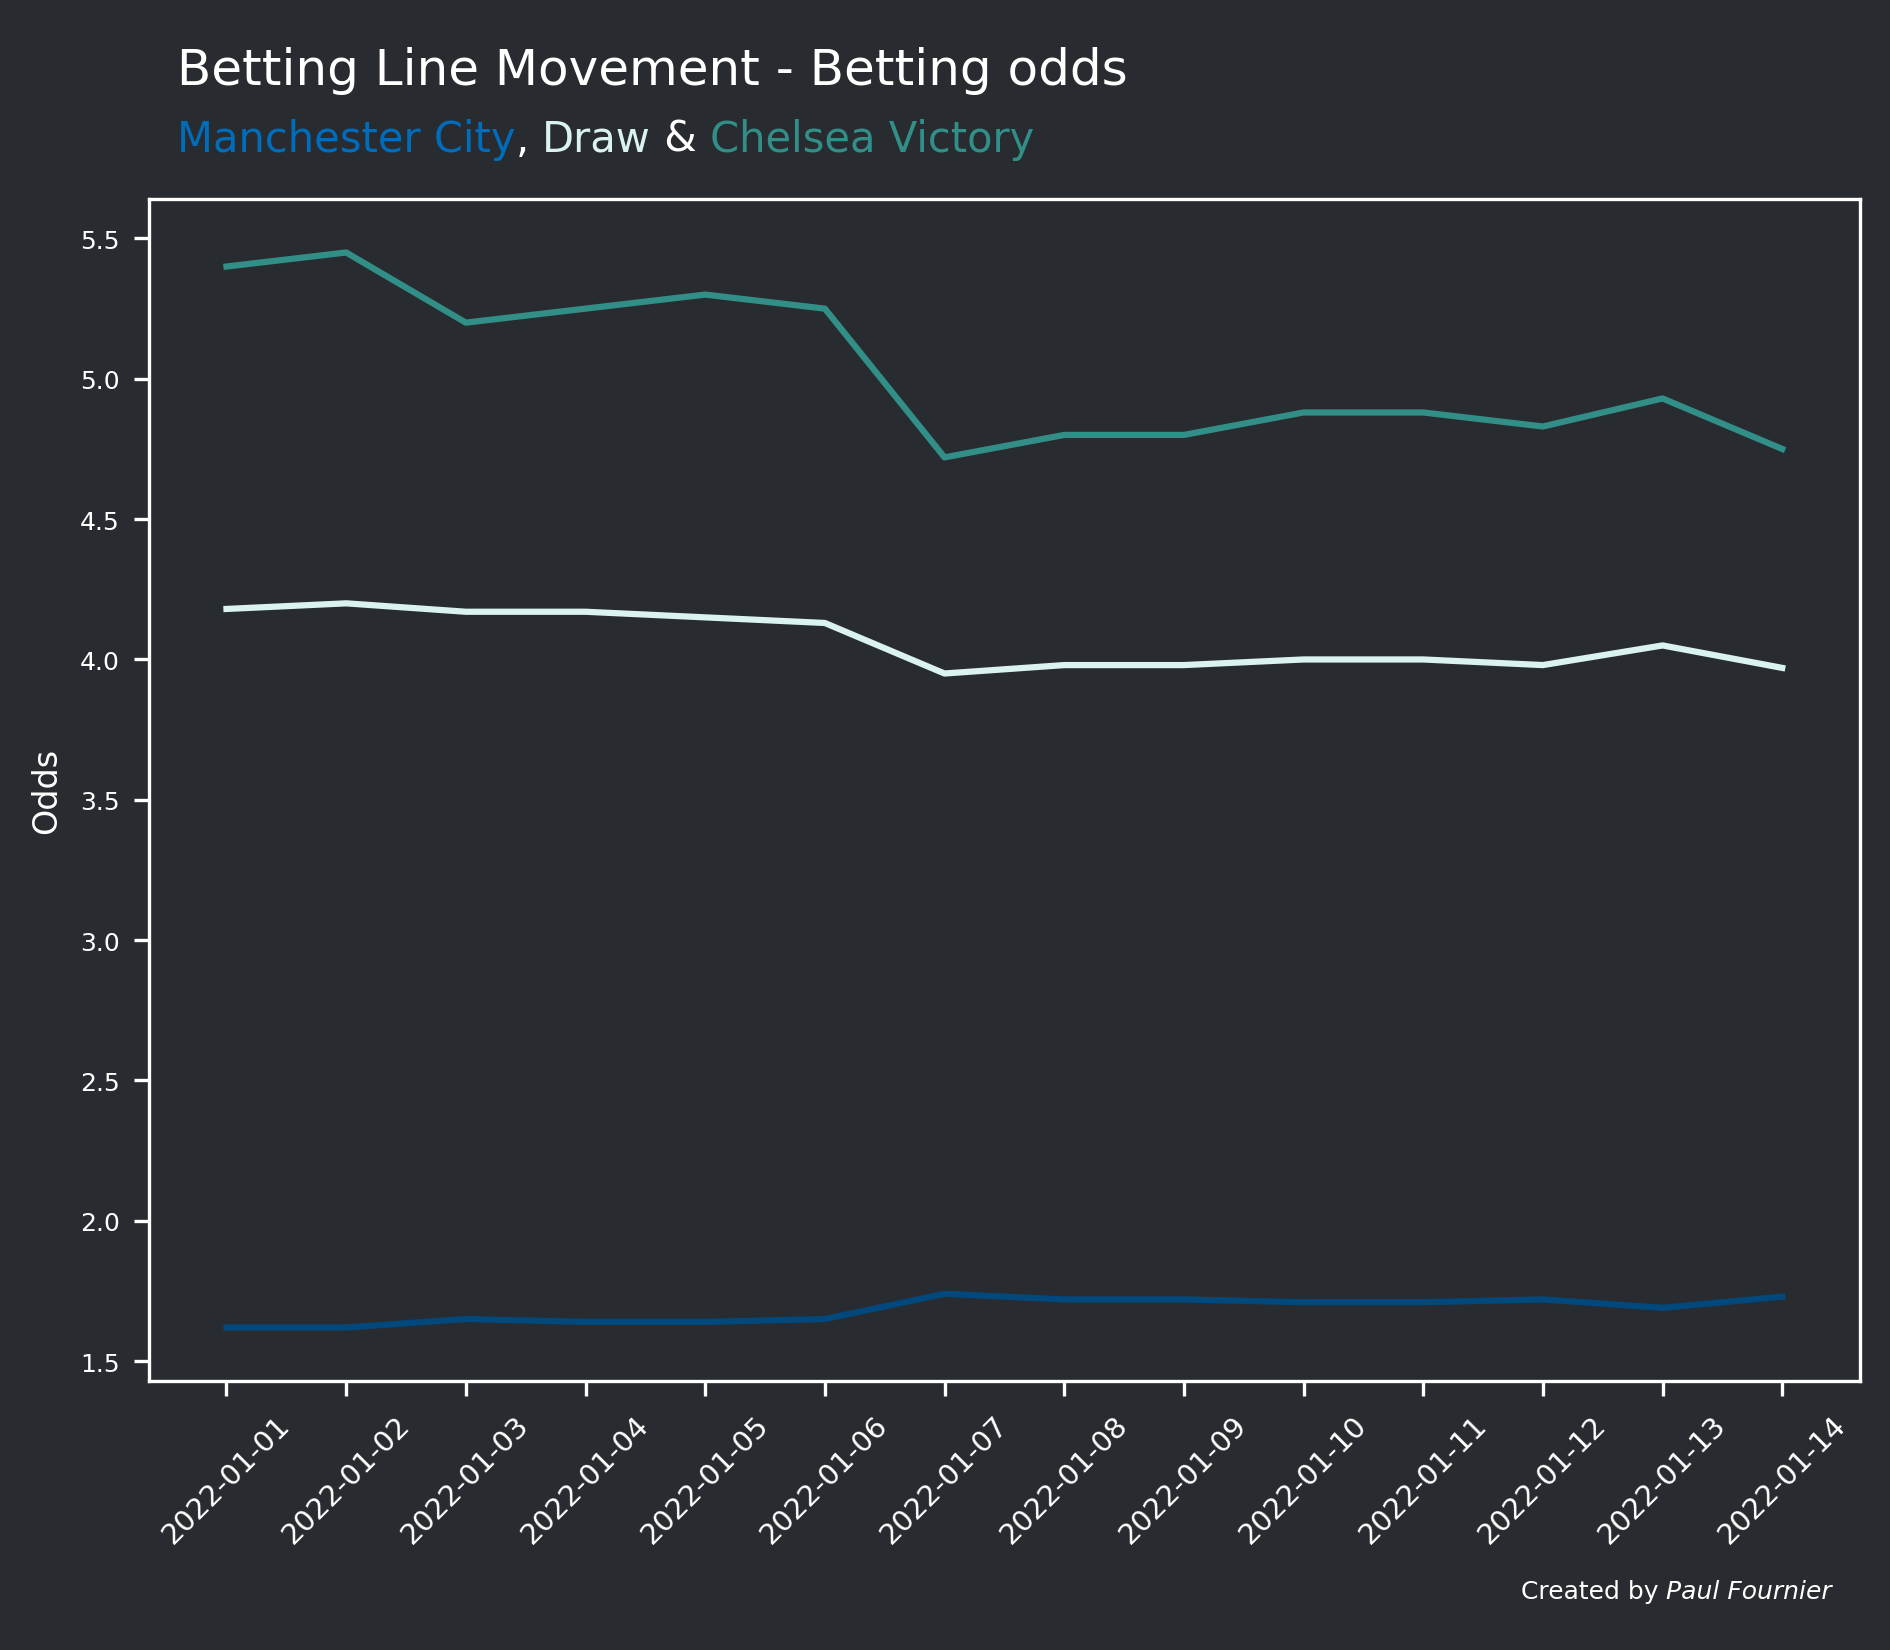

In [4]:
fig, ax = plt.subplots(tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

home_c = '#01497c'
draw_c = '#daf3f0'
away_c = '#318f88'

df = pd.DataFrame(df).sort_values(0, ignore_index=True)
df['odds_away'] = df[2]
df['odds_home'] = df[3]
df['odds_draw'] = df[4]

ax.plot(df[0], df['odds_home'], color=home_c)
ax.plot(df[0], df['odds_draw'], color=draw_c)
ax.plot(df[0], df['odds_away'], color=away_c)

ax.set_ylabel('Odds' , fontsize=8, color=text_color)

plt.xticks(rotation=45, fontweight='light',  fontsize='x-small',)

fig_text(
    x=0.1, y=1.075,
    s="Betting Line Movement - Betting odds",
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.1, y=1.025,
    s=f"<{home}>, <Draw> & <{[team for team in teams if team != home][0]} Victory>",
    highlight_textprops=[
            {"color": '#016DBA'},
            {"color": draw_c},
            {"color": away_c}
        ],
    fontsize=10, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.8, y=0.01,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()

The figure below shows the implied odds which is a method of processing betting odds and to represent the betting odds without the bookmaker margin, for the outcome $r \in (home, draw, away)$

$$ I_r = \frac{1}{\frac{o_r}{\frac{1}{o_{h}} + \frac{1}{o_{d}} + \frac{1}{o_{a}}}} $$

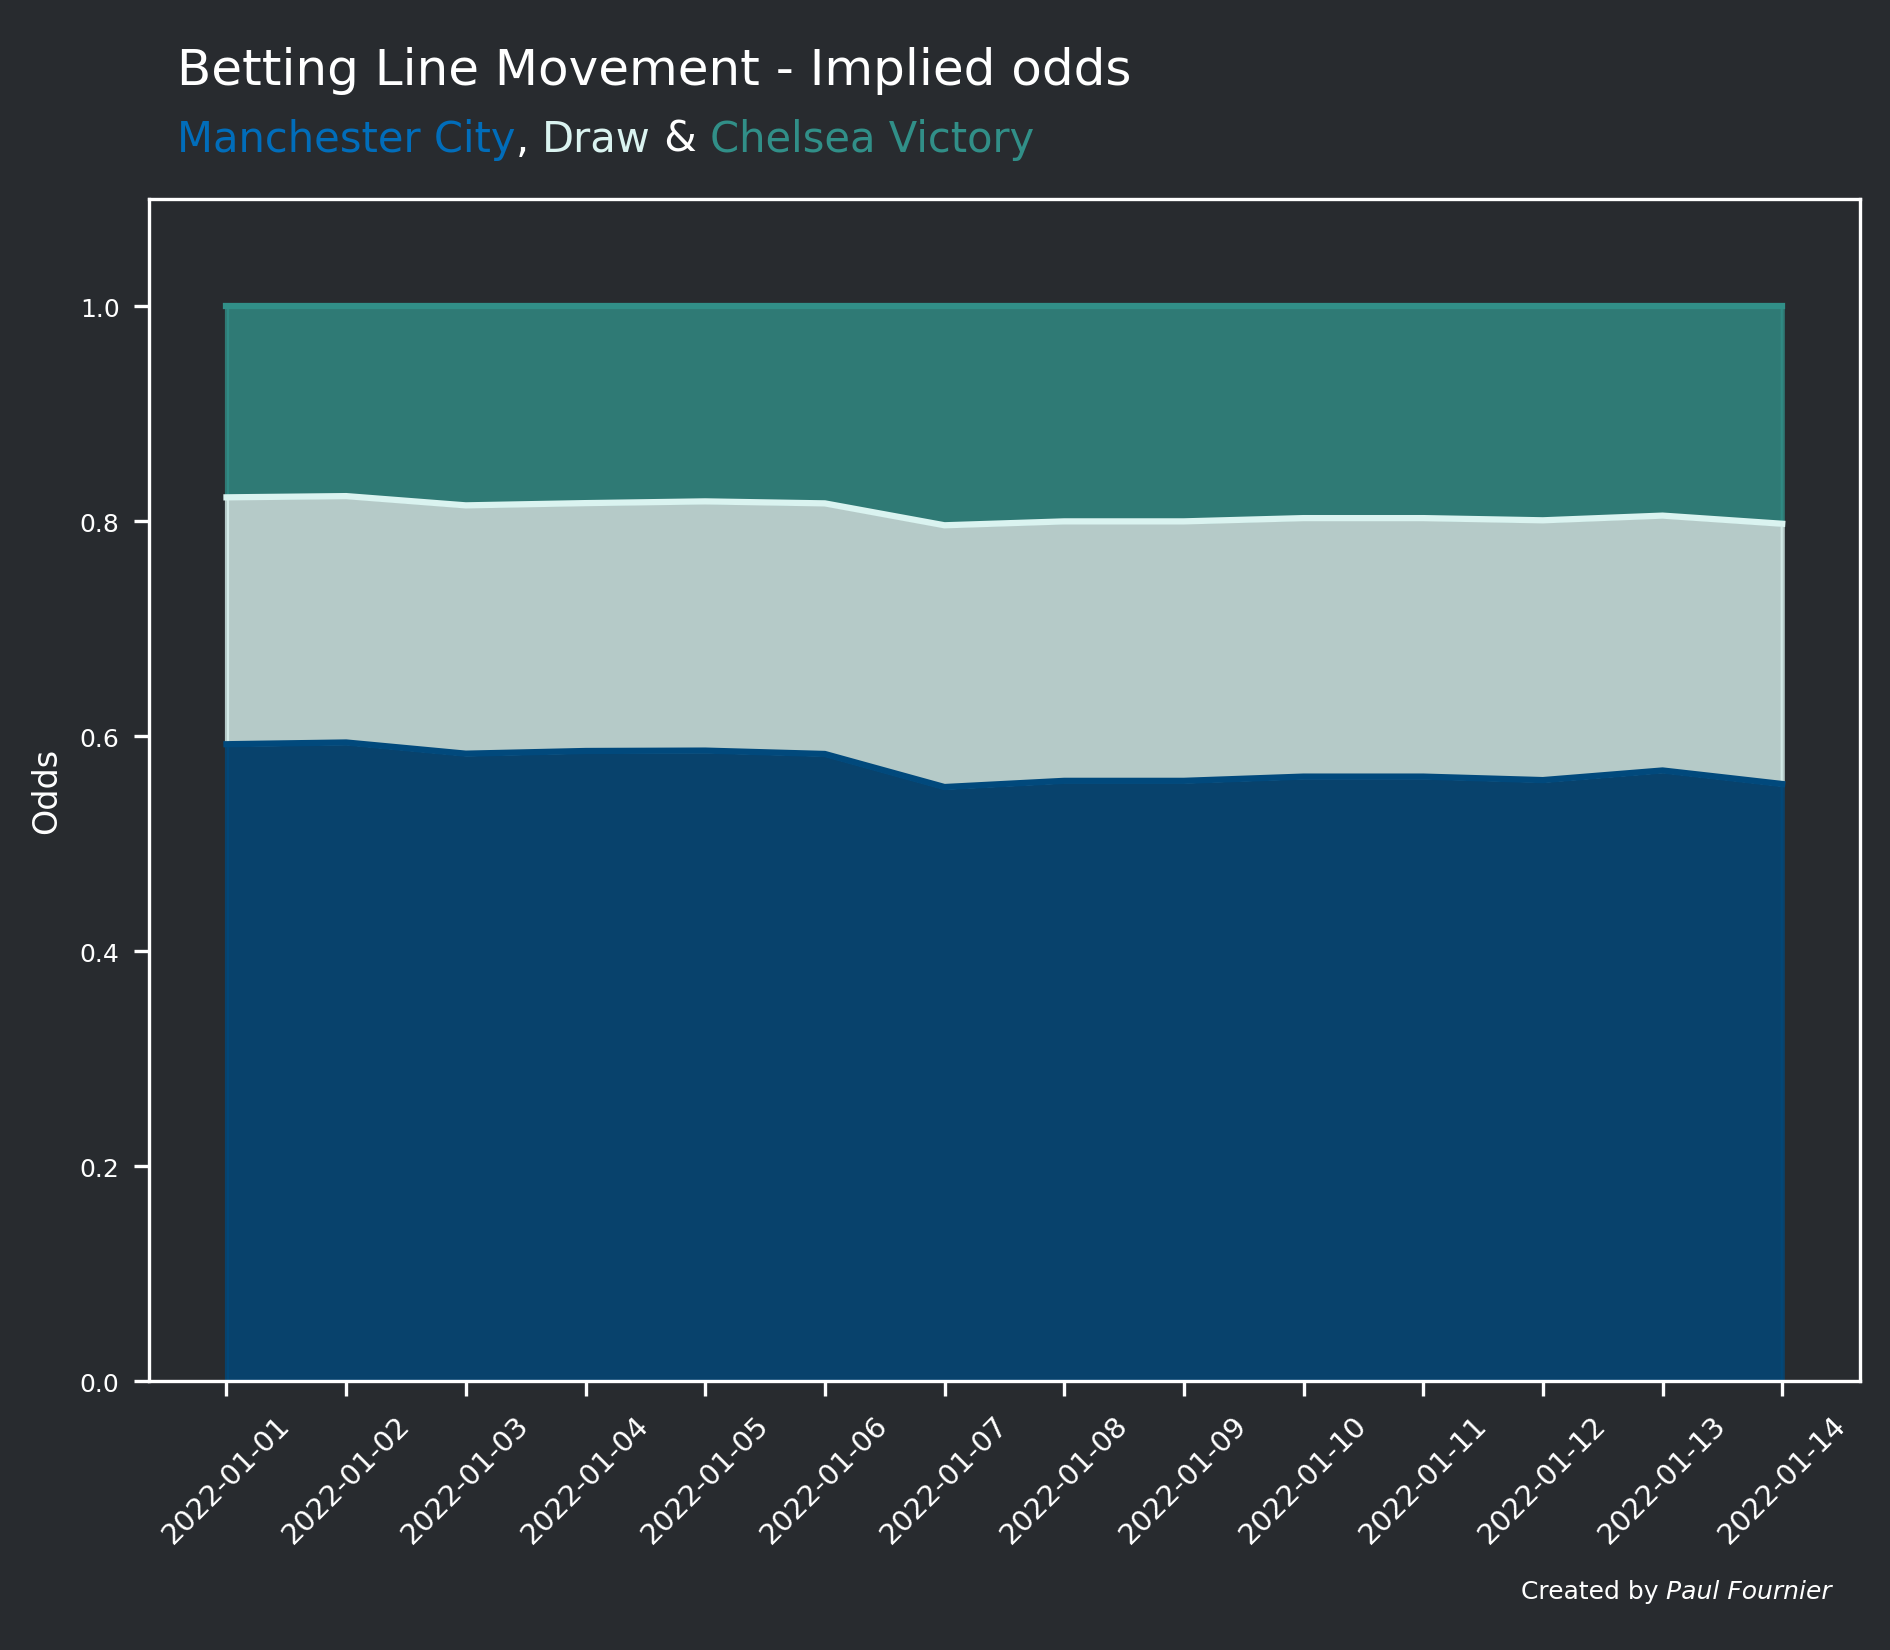

In [5]:
fig, ax = plt.subplots(tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

df = pd.DataFrame(df).sort_values(0, ignore_index=True)
df['odds_away'] = 1 / df[2] / (1/df[2] + 1/df[3] + 1/df[4])
df['odds_home'] = 1 / df[3] / (1/df[2] + 1/df[3] + 1/df[4])
df['odds_draw'] = 1 / df[4] / (1/df[2] + 1/df[3] + 1/df[4])

ax.plot(df[0], df['odds_home'], color=home_c)
#Fill under the curve
plt.fill_between(
    x = df[0],
    y1 = df['odds_home'],
    color = home_c,
    alpha = 0.8)

ax.plot(df[0], df['odds_home'] + df['odds_draw'], color=draw_c)
plt.fill_between(
     x = df[0],
     y1 = df['odds_home'] + df['odds_draw'],
     y2 = df['odds_home'],
     color = draw_c,
     alpha = 0.8)

ax.plot(df[0], df['odds_home'] + df['odds_draw'] + df['odds_away'], color=away_c)
plt.fill_between(
    x = df[0],
    y1 = df['odds_home'] + df['odds_draw'] + df['odds_away'],
    y2 = df['odds_home'] + df['odds_draw'],
    color = away_c,
    alpha = 0.8)

ax.set_ylabel('Odds' , fontsize=8, color=text_color)
ax.set_ylim([0, 1.1])
plt.xticks(rotation=45, fontweight='light',  fontsize='x-small',)

fig_text(
    x=0.1, y=1.075,
    s="Betting Line Movement - Implied odds",
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.1, y=1.025,
    s=f"<{home}>, <Draw> & <{[team for team in teams if team != home][0]} Victory>",
    highlight_textprops=[
            {"color": '#016DBA'},
            {"color": draw_c},
            {"color": away_c}
        ],
    fontsize=10, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.8, y=0.01,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()

There is no way to know if the betting companies apply margins uniformly to all betting lines, but this method gives an estimate for the betting companies predicted outcomes. Manchester City were favorites, sitting comfortably on top of the league and having won its previous 11 games while Chelsea drew 4 of their last 5 games and were going to play away from home. Chelsea, despite being considered the underdogs for this fixture by starting with implied odds of 17\%, were favored by the crowd. So much so that the betting site Betclic adjusted the odds considerably from 5.4 to 4.75 (a 12\% decrease), even though the implied odds stayed quite stable going from 18\% to 20\%. The decreasing betting odds for an outcome signifies that the the crowd heavily bets in its favor and the bookmakers adjust their odds accordingly. Without the information about the number of wagers placed on each outcome and the exact amount wagered, it is not possible to prove that the betting sites adjusted the odds to hedge risk. Yet since the implied odds were stable, one can assume that the betting companies did not reevaluate the betting odds in favor of the underdogs due to new public information but in fact to hedge risk.